<a href="https://www.kaggle.com/jagadish13/wisconsin-breast-cancer-classification-using-knn?scriptVersionId=90013457" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#### **1.0 About the Dataset**
- Wisconsin Breast Cancer dataset from the UCI Machine Learning Repository is a classification dataset containing records of breast cancer measurements.
  
- The dataset contains two classes, **benign** and **malignant**.

| Characteristics | Attributes | No. of Instances | No. of Attributes |
| --- | --- | --- | --- |
| Multivariate | Real | 569 | 32 |

- The size of the dataset is `127kb`.

[More about the dataset: UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29)

## **1. Importing Required Libraries**

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Statistical Analysis
import scipy.stats as stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Import the dataset**

In [2]:
# Breast Cancer Wisconsin (Diagnostic) Data Set
breast_cancer_data = pd.read_csv('./input/data.csv')

breast_cancer_data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


## **2. Data Exploration**

**Number of features in the dataset**

In [3]:
# Features in the dataset
print("Features in the dataset: \n{cols} \n\n Number of features in the dataset is {num_features}" 
.format(cols = list(breast_cancer_data.columns), num_features = len(breast_cancer_data.columns)))

Features in the dataset: 
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'] 

 Number of features in the dataset is 33


**Description of the dataset**

Tabulation of descriptive statistics for the Wisconsin Breast Cancer dataset.

In [4]:
# Dataset Description
breast_cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Information about the dataframe
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

From the above description, we can see that *most of the features in the dataset* is of type `float64` whereas, the id is of type `int64` and diagnosis is `object` datatype.

In [6]:
breast_cancer_data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

The `diagnosis` column is a `categorical` type as it contains the values `B` - Benign and `M` - Malignant.

In [7]:
breast_cancer_data.shape

(569, 33)

## **3. Data Preprocessing**

In [8]:
df_A = breast_cancer_data[['id','diagnosis','Unnamed: 32']]

df_A.head(3)

,id,diagnosis,Unnamed: 32
0,842302,M,NaN
1,842517,M,NaN
2,84300903,M,NaN


In [9]:
print("Number of Null values in the Unnamed: 32 column is", df_A['Unnamed: 32'].isnull().sum())

Number of Null values in the Unnamed: 32 column is 569


**Note :** The below colums needs some attention
* `id` - cannot be used for classification
* `diagnosis` - class labels
* `Unnamed: 32` - Includes NaN so will not be helpful for classification

Thus *dropping* the above columns from the dataset.

In [10]:
# The labels are the diagnosis column
labels_data = breast_cancer_data['diagnosis']

list_a = ['Unnamed: 32','id','diagnosis']

# The features are the rest of the columns
features_data = breast_cancer_data.drop(list_a, axis=1)

features_data.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [11]:
features_data.shape

(569, 30)

## **3.1 Data Visualization**

Number of Benign 357
Malignant count: 212


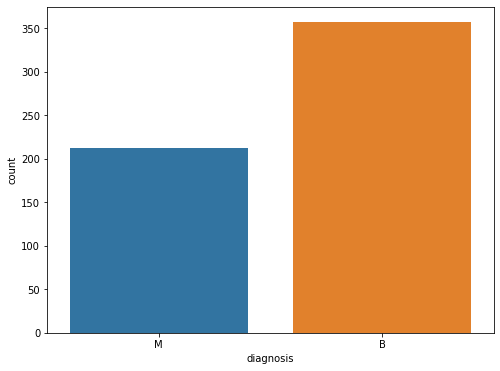

In [12]:
# Benign and Malignant count
print("Number of Benign {benign_count}\nMalignant count: {malignant_count}" 
.format(benign_count = labels_data.value_counts()[0], malignant_count = labels_data.value_counts()[1]))

plt.figure(figsize=(8,6))
labels_count = sns.countplot(labels_data, label="Count")

**Note:** We can see that the `dataset is imbalanced`, as the number of Benign samples is larger than the Malignant samples, so we `will need to balance the dataset`.

#### **3.2 Normalization**

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Creating an Object of StandardScaler
scaler = MinMaxScaler()

# Fit the dataframe to the scaler
print(scaler.fit(features_data))

MinMaxScaler()


In [14]:
# Transform the dataframe
features_scaled = scaler.transform(features_data)

# Convertin the scaled array to dataframe
features_scaled = pd.DataFrame(features_scaled, columns=features_data.columns)

features_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## **4. Training Pipeline**

The below section includes:
1. 10-Fold Cross Validation 
   
2. K-NN Classifier
   
3. Evaluation Metrics

4. Fine-tuning K-NN Model - Hyperparameter Optimization
  * A. Elbow Method
  
  * B. Grid Search

#### **4.1 10-Fold Cross Validation**

In [15]:
from sklearn.model_selection import KFold

## K-Fold cross validation with K=10 following main reference (Mahesh et al., 2022)
## "An Efficient Ensemble Method Using K-Fold Cross Validation for the Early Detection of Benign and Malignant Breast Cancer"
kf = KFold(n_splits=10, shuffle =True)

for train_index, test_index in kf.split(features_scaled):
      X_train, X_test = features_scaled.iloc[train_index], features_scaled.iloc[test_index]
      y_train, y_test = labels_data.iloc[train_index], labels_data.iloc[test_index]


In [16]:
print('X_train Shape is  ' , X_train.shape)
print('X_test Shape is  ' , X_test.shape)
print('y_train Shape is  ' ,y_train.shape)
print('y_test Shape is  ' , y_test.shape)

X_train Shape is   (513, 30)
X_test Shape is   (56, 30)
y_train Shape is   (513,)
y_test Shape is   (56,)


#### **4.2 K-NN Classifier**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std

## KNN Classifier with K=9 following main reference (Assegie,2020) 
## "An optimized K-Nearest Neighbor based breast cancer detection"
knn = KNeighborsClassifier(n_neighbors=9,  weights='uniform', metric='euclidean')

# prepare the cross-validation procedure
# cv = KFold(n_splits=4, random_state=1, shuffle=True)

## Fit the model aka train the model
knn.fit(X_train, y_train)

#train model with cv of 4 
# cv_scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
# print('Accuracy of model training: %.3f (%.3f)' % (mean(cv_scores), std(cv_scores)))

## Predict the values
pred = knn.predict(X_test)

score = knn.score(X_test, y_test)

print("Model Accuracy: % {}".format(score*100))

Model Accuracy: % 96.42857142857143


#### **4.3 Evaluation Metrics**

In [18]:
# Classification Report and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

# Accuracy Score
from sklearn.metrics import accuracy_score

# Precision Score
from sklearn.metrics import precision_score

# Sensitivity Score
from sklearn.metrics import recall_score

# Cross Validation Score
from sklearn.model_selection import cross_val_score

In [19]:
# Classification Report and Confusion Matrix
print("Novel k-NN Classification Report:",)
cv_report = classification_report(y_test, pred)
print (cv_report)

conf_mat = confusion_matrix(y_test, pred)
cv_confusion = pd.DataFrame(conf_mat, index=['Benign','Malignant'], 
                            columns=['Benign','Malignant'])
print(cv_confusion)

#print("Classification Report\n",classification_report(y_test, pred), 
#"\n\nConfusion Matrix\n",confusion_matrix(y_test, pred))

# Accuracy Score for whole of Test Data
print("\nAccuracy Score",accuracy_score(y_test, pred))
# Precision Score for whole of Test Data
print("Precision Score",precision_score(y_test, pred, average='binary', pos_label='M'))
# Sensitivity Score for whole of Test Data
print("Sensitivity Score",recall_score(y_test, pred, average='binary', pos_label='M'))

Novel k-NN Classification Report:
              precision    recall  f1-score   support

           B       0.94      1.00      0.97        29
           M       1.00      0.93      0.96        27

    accuracy                           0.96        56
   macro avg       0.97      0.96      0.96        56
weighted avg       0.97      0.96      0.96        56

           Benign  Malignant
Benign         29          0
Malignant       2         25

Accuracy Score 0.9642857142857143
Precision Score 1.0
Sensitivity Score 0.9259259259259259


In [20]:
cv_confusion = pd.DataFrame(conf_mat, index=['Benign','Malignant'], 
                            columns=['Benign','Malignant'])
cv_confusion

,Benign,Malignant
Benign,29,0
Malignant,2,25


#### **4.4 Finetuning the K-NN model - Hyperparameter Optimization**

* Hyperparamerter tuning is a process of tuning the hyperparameters of a model to obtain the best possible performance.
  
* Optimal values for hyperparameters `reduced` the `noise on classification` and `overfitting` of the model.

* In this project the Hyperparameter Optimization is done using two techniques:
  
  * Elbow Method
  
  * Grid Search

#### **A. Elbow Method**

**Error Rate vs N_Neighbors**

In [21]:
error_rate = []

# prepare the cross-validation procedure
# cv = KFold(n_splits=4, random_state=1, shuffle=True)
kf = KFold(n_splits=10, shuffle =True)

# Range of n_neighbors for KNN
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    # scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')
    # error_rate.append(1 - scores.mean())
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [22]:
# Sort error_rate and n_neighbors in ascending order
sorted_indices = np.argsort(error_rate)
sorted_error_rate = np.array(error_rate)[sorted_indices]
sorted_n_neighbors = np.arange(1, 40)[sorted_indices]

for error, neighbors in zip(sorted_error_rate, sorted_n_neighbors):
    print('Error Rate:', error)
    print('n_neighbors:', neighbors)
    print('---')

Error Rate: 0.017857142857142856
n_neighbors: 3
---
Error Rate: 0.017857142857142856
n_neighbors: 7
---
Error Rate: 0.03571428571428571
n_neighbors: 1
---
Error Rate: 0.03571428571428571
n_neighbors: 16
---
Error Rate: 0.03571428571428571
n_neighbors: 15
---
Error Rate: 0.03571428571428571
n_neighbors: 19
---
Error Rate: 0.03571428571428571
n_neighbors: 21
---
Error Rate: 0.03571428571428571
n_neighbors: 22
---
Error Rate: 0.03571428571428571
n_neighbors: 23
---
Error Rate: 0.03571428571428571
n_neighbors: 9
---
Error Rate: 0.03571428571428571
n_neighbors: 17
---
Error Rate: 0.03571428571428571
n_neighbors: 6
---
Error Rate: 0.03571428571428571
n_neighbors: 5
---
Error Rate: 0.03571428571428571
n_neighbors: 4
---
Error Rate: 0.03571428571428571
n_neighbors: 2
---
Error Rate: 0.03571428571428571
n_neighbors: 18
---
Error Rate: 0.05357142857142857
n_neighbors: 25
---
Error Rate: 0.05357142857142857
n_neighbors: 24
---
Error Rate: 0.05357142857142857
n_neighbors: 20
---
Error Rate: 0.0535

In [23]:
print(error_rate)

[0.03571428571428571, 0.03571428571428571, 0.017857142857142856, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.017857142857142856, 0.05357142857142857, 0.03571428571428571, 0.05357142857142857, 0.05357142857142857, 0.05357142857142857, 0.05357142857142857, 0.05357142857142857, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.05357142857142857, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.05357142857142857, 0.05357142857142857, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142]


Note: error rate 11 > 4

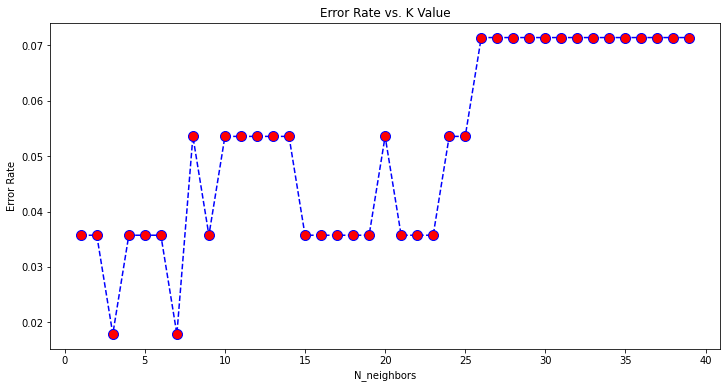

In [24]:
plt.figure(figsize=(12,6))

error_rate_plot = plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', 
    markerfacecolor='red', markersize=10)

error_rate_plot = plt.title('Error Rate vs. K Value')

error_rate_plot = plt.xlabel('N_neighbors')

error_rate_plot = plt.ylabel('Error Rate')

From the above plot its evident that `Error Rate` is  `increasing` for higher values of n_neighbors. The *optimal value* for n_neighbors from the above plot is *7, 9 and 11*.


**Classification Report of KNN Model for n_neighbors = 4 or 11 (needs to be further decided)**

#### **B. Grid Search**

In [25]:
# Grid Search from Model Selection Library
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [3,7]}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, n_jobs = -1)

g_res = gs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [26]:
print('The best score: ', g_res.best_score_)

print('The best parameter: ', g_res.best_params_)

The best score:  0.9609937178754997
The best parameter:  {'n_neighbors': 3}


In [27]:
import numpy as np

allscores = g_res.cv_results_['mean_test_score']
allparams = g_res.cv_results_['params']

sorted_indices = np.argsort(allscores)[::-1]  # Sort indices in descending order
sorted_scores = allscores[sorted_indices]
sorted_params = [allparams[i] for i in sorted_indices]

for score, params in zip(sorted_scores, sorted_params):
    print('Score:', score)
    print('Params:', params)
    print('---')


Score: 0.9609937178754997
Params: {'n_neighbors': 3}
---
Score: 0.9590900437845041
Params: {'n_neighbors': 7}
---


In [28]:
## KNN Classifier with K=4
knn = KNeighborsClassifier(n_neighbors=3,  weights='uniform', metric='euclidean')

# prepare the cross-validation procedure
# cv = KFold(n_splits=4, random_state=1, shuffle=True)

## Fit the model
knn.fit(X_train, y_train)

#train model with cv of 4 
# cv_scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
# print('Accuracy of model training: %.3f (%.3f)' % (mean(cv_scores), std(cv_scores)))

## Predict the values
pred = knn.predict(X_test)

score = knn.score(X_test, y_test)

print("Model Accuracy: % {}".format(score*100))

Model Accuracy: % 98.21428571428571


In [29]:
# Classification Report and Confusion Matrix
print("Hyperparameter Tuned k-NN\n\nClassification Report\n")
cv_report = classification_report(y_test, pred)
print (cv_report)

conf_mat = confusion_matrix(y_test, pred)
cv_confusion = pd.DataFrame(conf_mat, index=['Benign','Malignant'], 
                            columns=['Benign','Malignant'])
print(cv_confusion)

# Accuracy Score for whole of Test Data
print("Accuracy Score",accuracy_score(y_test, pred))

# Precision Score for whole of Test Data
print("Precision Score",precision_score(y_test, pred, average='binary', pos_label='M'))

# Sensitivity Score for whole of Test Data
print("Sensitivity Score",recall_score(y_test, pred, average='binary', pos_label='M'))

Hyperparameter Tuned k-NN

Classification Report

              precision    recall  f1-score   support

           B       0.97      1.00      0.98        29
           M       1.00      0.96      0.98        27

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56

           Benign  Malignant
Benign         29          0
Malignant       1         26
Accuracy Score 0.9821428571428571
Precision Score 1.0
Sensitivity Score 0.9629629629629629


#### **3.2 Feature Selection with RFECV**

* Baseline score is used as the measure of WBCD classification performance before feature selection

In [30]:
# Baseline score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# prepare the cross-validation procedure
# cv = KFold(n_splits=4, random_state=1, shuffle=True)

RF=RandomForestClassifier(random_state=0)
predRF = RF.fit(X_train, y_train)
# score=cross_val_score(RF,features_data,labels_data,cv=cv,scoring='accuracy')
print("Baseline Accuracy Score",accuracy_score(y_test,predRF.predict(X_test)))

Baseline Accuracy Score 0.9642857142857143


**RFECV Feature Selection Model**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

RF=RandomForestClassifier(random_state=0)
kf = KFold(n_splits=10, shuffle =True)
rfecv=RFECV(estimator=RF,step=1,cv=kf,scoring='accuracy')
#since it uses cross validation, this research fit it to the whole dataset
rfecv.fit(X_train, y_train)

RFECV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
      estimator=RandomForestClassifier(random_state=0), scoring='accuracy')

In [32]:
#to get number of the features
print('Optimal number of features:', rfecv.n_features_)

#to get feature names
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features: 18
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'concave points_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')


In [33]:
mean_scores = rfecv.cv_results_['mean_test_score']
num_features = range(1, len(mean_scores) + 1)  # Number of features or RFECV iterations

sorted_indices = np.argsort(mean_scores)[::-1]  # Sort indices in descending order
sorted_scores = mean_scores[sorted_indices]
sorted_num_features = [num_features[i] for i in sorted_indices]

for score, num_features in zip(sorted_scores, sorted_num_features):
    print('Mean Test Score:', score)
    print('Number of Features or RFECV Iterations:', num_features)
    print('---')

Mean Test Score: 0.9650452488687783
Number of Features or RFECV Iterations: 18
---
Mean Test Score: 0.9630090497737557
Number of Features or RFECV Iterations: 23
---
Mean Test Score: 0.9611236802413273
Number of Features or RFECV Iterations: 16
---
Mean Test Score: 0.9611236802413273
Number of Features or RFECV Iterations: 20
---
Mean Test Score: 0.9592006033182503
Number of Features or RFECV Iterations: 15
---
Mean Test Score: 0.9591628959276018
Number of Features or RFECV Iterations: 28
---
Mean Test Score: 0.9591251885369532
Number of Features or RFECV Iterations: 17
---
Mean Test Score: 0.9591251885369532
Number of Features or RFECV Iterations: 19
---
Mean Test Score: 0.9572398190045248
Number of Features or RFECV Iterations: 14
---
Mean Test Score: 0.9572021116138764
Number of Features or RFECV Iterations: 26
---
Mean Test Score: 0.9572021116138764
Number of Features or RFECV Iterations: 24
---
Mean Test Score: 0.9571644042232277
Number of Features or RFECV Iterations: 29
---
Mean

In [34]:
rfecv.cv_results_['mean_test_score']

array([0.86926848, 0.92017345, 0.92794118, 0.93190045, 0.93574661,
       0.93382353, 0.94159125, 0.94935897, 0.94358974, 0.9474359 ,
       0.94358974, 0.95139517, 0.9571267 , 0.95723982, 0.9592006 ,
       0.96112368, 0.95912519, 0.96504525, 0.95912519, 0.96112368,
       0.9571644 , 0.95527903, 0.96300905, 0.95720211, 0.95328054,
       0.95720211, 0.95331825, 0.9591629 , 0.9571644 , 0.95139517])

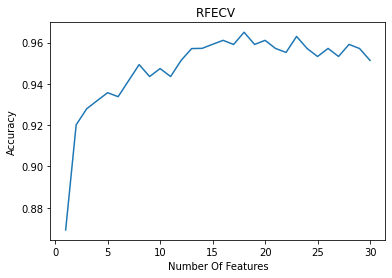

In [35]:
#We can see that the best number of features is 17
# Data Visualization
import matplotlib.pyplot as plt
plt.title("RFECV ")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

**Dropping irrelevant features eliminated by RFECV**

In [36]:
# List of correlated features, planned to drop
# drop_list = ['smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 
#              'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'compactness_se', 
#              'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'fractal_dimension_worst']

# List of correlated features, planned to drop
drop_list = X_train.columns[~rfecv.support_]
print("Dropped feature :",drop_list)

# Updated scaled features dataset
features_updated = features_scaled.drop(drop_list,axis = 1)
features_updated.head()

Dropped feature : Index(['compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'fractal_dimension_worst'],
      dtype='object')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.703140,0.731113,0.369034,0.273811,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.203608,0.348757,0.124440,0.125660,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.462512,0.635686,0.180370,0.162922,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.565604,0.522863,0.126655,0.038155,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.463918,0.518390,0.220563,0.163688,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500


In [37]:
print("Shape after dropping correlated features",features_updated.shape)

Shape after dropping correlated features (569, 18)


In [38]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle =True)

for train_index, test_index in kf.split(features_updated):
      X_train, X_test = features_updated.iloc[train_index], features_updated.iloc[test_index]
      y_train, y_test = labels_data.iloc[train_index], labels_data.iloc[test_index]

print('X_train Shape is  ' , X_train.shape)
print('X_test Shape is  ' , X_test.shape)
print('y_train Shape is  ' ,y_train.shape)
print('y_test Shape is  ' , y_test.shape)

X_train Shape is   (513, 18)
X_test Shape is   (56, 18)
y_train Shape is   (513,)
y_test Shape is   (56,)


In [39]:
RF=RandomForestClassifier(random_state=0)
predRF = RF.fit(X_train, y_train)
# score=cross_val_score(RF,features_data,labels_data,cv=cv,scoring='accuracy')
print("Baseline Accuracy Score",accuracy_score(y_test,predRF.predict(X_test)))

Baseline Accuracy Score 0.9642857142857143


#### **3.2.1 Is our Feature Selection right?**

In [40]:
# Train data 70% 
# X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, train_size=0.70, random_state=42)

## KNN Classifier with K=11
knn = KNeighborsClassifier(n_neighbors=3,  weights='uniform', metric='euclidean')

# prepare the cross-validation procedure
# cv = KFold(n_splits=4, random_state=1, shuffle=True)

## Fit the model
knn.fit(X_train, y_train)

#train model with cv of 4 
# cv_scores = cross_val_score(knn, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

## Predict the values
pred = knn.predict(X_test)

print("RFECV Hyperparameter Tuned k-NN\n\nClassification Report\n",classification_report(y_test, pred)) 

print("\n\nConfusion Matrix\n")
conf_mat = confusion_matrix(y_test, pred)
cv_confusion = pd.DataFrame(conf_mat, index=['Benign','Malignant'], 
                            columns=['Benign','Malignant'])
print(cv_confusion)

print("\nAccuracy Score",accuracy_score(y_test, pred))

# Precision Score for whole of Test Data
print("Precision Score",precision_score(y_test, pred, average='binary', pos_label='M'))

# Sensitivity Score for whole of Test Data
print("Sensitivity Score",recall_score(y_test, pred, average='binary', pos_label='M'))

RFECV Hyperparameter Tuned k-NN

Classification Report
               precision    recall  f1-score   support

           B       1.00      0.97      0.99        38
           M       0.95      1.00      0.97        18

    accuracy                           0.98        56
   macro avg       0.97      0.99      0.98        56
weighted avg       0.98      0.98      0.98        56



Confusion Matrix

           Benign  Malignant
Benign         37          1
Malignant       0         18

Accuracy Score 0.9821428571428571
Precision Score 0.9473684210526315
Sensitivity Score 1.0


## **Conclusion**

### *Before* Hyperparameter Tuning & Feature Selection

features = 30

n_neighbours = 11 (referring to main reference)

Accuracy= 95.5%

Precision= 94.28%


### *After* Hyperparameter Tuning

n_neighbours = 4

Accuracy= 95.5%

Precision= 94.28%


### *After* Hyperparameter Tuning & Feature Selection

features = 13

n_neighbours = 4

Accuracy= 95%

Precision= 95.52%